<a href="https://colab.research.google.com/github/amornvitz/HCIA-AI/blob/main/HCIA_AI_Day2_Stock_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Predict an equity price trend
* To predict the price of Apple Incp (US Stock) based on the current close price.
* Using the Long Short Term Memory (LSTM) Algorithm
* Predict the closing price of a company, APPLE INC. based on the past 60 days of stock price.

In [1]:
import numpy as np
import math
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the stock quote for APPLE INC. using the stock ticker AAPL form Jan 2012 to Oct 25 2020
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-10-25')
# display the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-10-19,120.419998,115.660004,119.959999,115.980003,120639300.0,115.980003
2020-10-20,118.980003,115.629997,116.199997,117.510002,124423700.0,117.510002
2020-10-21,118.709999,116.449997,116.669998,116.870003,89946000.0,116.870003


In [3]:
# display the shape of data
df.shape

(2218, 6)

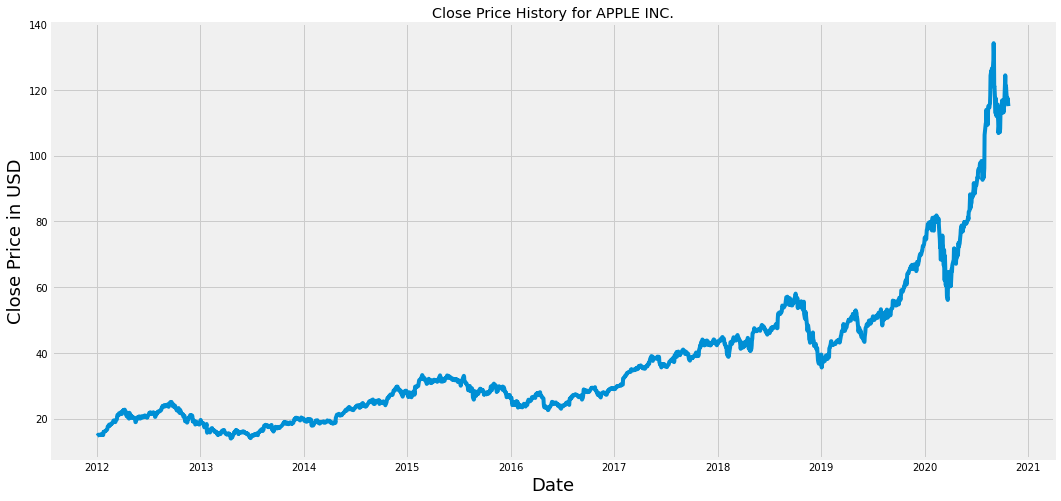

In [4]:
# visualize the record in the dataset in the form of a graph (for closing price history for APPLE INC.)
plt.figure(figsize=(16,8))
plt.title('Close Price History for APPLE INC.')
plt.plot(df.Close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in USD', fontsize = 18)
plt.show()

# **Data preprocessing**

In [5]:
# create a new dataframe for the close price.
data = df.filter(['Close'])

# converting the dataframe to numpy array
dataset = data.values

# decide the training and testing dataset -> 80%
training_data_len = math.ceil(len(dataset)*.80)

In [6]:
# Data Normalizing
# Scale all the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [7]:
# Create the scale training dataset
train_data = scaled_data[0:training_data_len,:]

# Split the data into input and output dataset (x_train, y_train)
x_train = []
y_train = []

# 60 is coming form 60 days.
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])

In [8]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data into 3-dimensional form (no of samples, no of time steps, no of features) the shape accepted by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **Building the model**
* Build LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons, and the other with 1 neuron

In [10]:
# Build LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the LSTM model
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#Train the LSMT Model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1715/1715 [==============================] - 10s 6ms/step - loss: 2.3614e-04
Epoch 2/10
1715/1715 [==============================] - 10s 6ms/step - loss: 1.1833e-04
Epoch 3/10
1715/1715 [==============================] - 10s 6ms/step - loss: 8.6216e-05
Epoch 4/10
1715/1715 [==============================] - 10s 6ms/step - loss: 6.8494e-05
Epoch 5/10
1715/1715 [==============================] - 10s 6ms/step - loss: 6.5694e-05
Epoch 6/10
1715/1715 [==============================] - 10s 6ms/step - loss: 5.2064e-05
Epoch 7/10
1715/1715 [==============================] - 10s 6ms/step - loss: 4.9696e-05
Epoch 8/10
1715/1715 [==============================] - 10s 6ms/step - loss: 5.2030e-05
Epoch 9/10
1715/1715 [==============================] - 10s 6ms/step - loss: 5.6858e-05
Epoch 10/10
1715/1715 [==============================] - 10s 6ms/step - loss: 4.1819e-05


In [15]:
# create test dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert the x_test set to a numpy array
x_test = np.array(x_test)

# Reshape the data into 3-dimensional form (no of samples, no of time steps, no of features) the shape accepted by LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **Model Testing**

In [19]:
# Getting the models to predict price values
prediction = model.predict(x_test)

# undo normalization
prediction = scaler.inverse_transform(prediction)

# Measure the model assessment for accuracy
# Value of 0 means the model predicting value matching the actual value from the test dataset perfectly; the lower the value the better the model performed.
# there are mnay metrics to value the performance of the model. Root Mean Square Error (RMSE) is used here.
# Calculate the value of RMSE as follows:
rmse = np.sqrt(np.mean(prediction-y_test)**2)
print("RMSE Value: ", rmse)

RMSE Value:  0.157107678277767


* Data testing
* Model validation completed with acceptable prediction accuracy, data testing is launching now.

In [22]:
# create and plot the data for a graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['prediction'] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
